<a href="https://colab.research.google.com/github/SamoaChen/Frequentist-ML/blob/main/Model_Accessment_and_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Seed the generator
np.random.seed(420)

#----------------INITIATE THE DATA_X matrix
data_x = np.zeros((50, 5000))

#----------------TABULATE THE DATA_X MATRIX WITH STANDARD GAUSSIAN DISTRIBUTION
for column_num in range(5000):
  data_x[:,column_num] = np.random.normal(0,1,50)

#----------------TABULATE THE DATA_Y ARRAY WITH RANDOM ASSIGNED CLASSES
data_y = np.zeros((50,1))
data_y[25:] = 1
np.random.shuffle(data_y)

In [ ]:
#----------------FUNCTIONS
#PLACE TO STORE LAST CV DIVISION FOR PLOTTING
test_plot_cord_wrong = []
test_plot_cord_right = []
#PLACE TO STORE LAST FEATURE SELECTION IN RIGHT METHOD
arg_order_right = []
#FUNCTION FOR CROSS VALIDATION WRONG METHOD
def cross_vali(data_x,data_y,fold):
  global test_plot_cord_wrong
  #STEP
  step = int(data_x.shape[0]/fold)
  #ERR VECTOR FOR CV 
  err_vec = np.zeros(fold)
  #LOOP THROUGH EACH FOLD
  for i in range(fold):
    test_cord = np.arange(i*step,i*step+step,1)
    train_cord = np.delete(np.arange(0,50,1),test_cord)
    #STORE TEST PLOT CORD
    test_plot_cord_wrong = test_cord
    #CAL ERROR VECTOR
    err_vec[i] = cv_err(data_x[train_cord,:],data_y[train_cord,:],data_x[test_cord,:],data_y[test_cord,:])
  err = sum(err_vec)/err_vec.size
  return err

#FUNCTION FOR CROSS VALIDATION RIGHT METHOD
def cross_vali_right(data_x,data_y,fold):
  global test_plot_cord_right
  global arg_order_right
  #STEP
  step = int(data_x.shape[0]/fold)
  #ERR VECTOR FOR CV 
  err_vec = np.zeros(fold)
  #LOOP THROUGH EACH FOLD
  for i in range(fold):
    test_cord = np.arange(i*step,i*step+step,1)
    train_cord = np.delete(np.arange(0,50,1),test_cord)
    #FORM TRAIN AND TEST SETS
    train_x = data_x[train_cord,:]
    train_y = data_y[train_cord,:]
    test_x = data_x[test_cord,:]
    test_y = data_y[test_cord,:]
    #SELECT 100 MOST CORRELATED FEATURES
    correlation_vec = np.zeros(data_x.shape[1])
    for num in range(data_x.shape[1]):
      #CALCULATE CORRELATION
      correlation_vec[num] = np.correlate(train_x[:,num],train_y.flatten())

    #SORT CORRELATION BY MAGNITUDE
    #arg_order = np.argsort(np.absolute(correlation_vec))
    arg_order = np.argsort(correlation_vec)
    arg_order = arg_order[4900:]
    #STORE LAST TEST CORD AND ARG ORDER
    test_plot_cord_right = test_cord
    arg_order_right = arg_order
    #SEPERATE MOST CORRELATED FEATURES
    train_x = train_x[:,arg_order]
    test_x = test_x[:,arg_order] 

    #CALCULATE ERR
    err_vec[i] = cv_err(train_x,train_y,test_x,test_y)
  err = sum(err_vec)/err_vec.size
  return err

#FUNCTION FOR ERROR CALCULATION
def cv_err(Train_x,Train_y,Test_x,Test_y):
  knn = KNeighborsClassifier()
  knn.fit(Train_x,Train_y.flatten())
  pred = knn.predict(Test_x)
  err = 100*(1-sum(pred == Test_y.flatten())/Test_y.shape[0])
  return err




In [ ]:
#-----------------WRONG METHOD
#INITIATE THE ARRAY FOR STORING CORRELATIONS
correlations = np.zeros(5000)

#TABULATE THE CORRELATION ARRAY
for num in range(5000):
  correlations[num] = np.correlate(data_x[:,num],data_y.flatten())

#SORT CORRELATION BY MAGNITUDE
#arg_order = np.argsort(np.absolute(correlations))
arg_order = np.argsort(correlations)
arg_order = arg_order[4900:]
#SEPERATE MOST CORRELATED FEATURES
data_x_select = data_x[:,arg_order]

#CALCULATE ERROR 
wrong_err = cross_vali(data_x_select, data_y, 5)
print("The cross-validation error for wrong method is: ",wrong_err,"%")


The cross-validation error for wrong method is:  7.999999999999998 %


The cross validation error for the wrong method gives a small error at 8%, which matches with the expectation


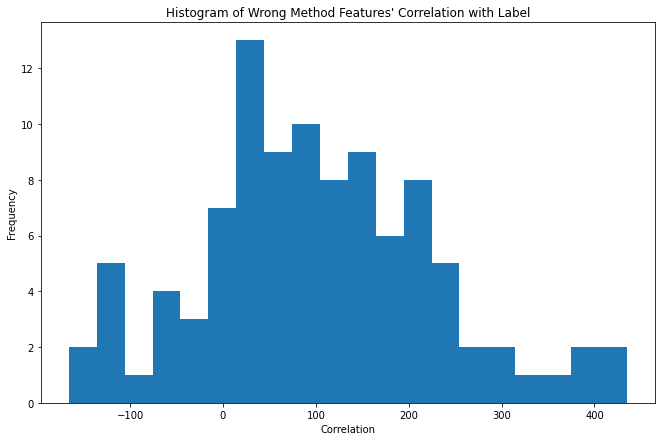

In [ ]:
#---------------HISTOGRAM OF CORRELATIONS OF RANDOMLY GENERATED FEATURES WITH LABLE
#TEST SET WITH FEATURES SELECTED IN WRONG WAY
test_x_select = data_x[:,arg_order]
test_x_select = test_x_select[test_plot_cord_wrong,:]
test_y_selct = data_y[test_plot_cord_wrong]
#INITIATE THE ARRAY FOR STORING CORRELATIONS
correlations_test = np.zeros(100)
#RECALC CORRELATION
for num in range(100):
  correlations_test[num] = np.correlate(test_x_select[:,num],test_plot_cord_wrong.flatten())
#PLOT THE HISTOGRAM
plt.figure(figsize=(11,7))
plt.hist(correlations_test, bins=20)
plt.title('Histogram of Wrong Method Features\' Correlation with Label')
plt.ylabel('Frequency')
plt.xlabel('Correlation')
plt.show()

In [ ]:
np.mean(correlations_test)

102.59186197234068

Because the correlation value is used here instead of correlation coefficient, the value can get pretty big respectively. The average correlation deviate about 100 unit from 0

In [ ]:
#----------------RIGHT METHOD
right_err = cross_vali_right(data_x,data_y,5)

#CALCULATE ERROR 
print("The cross-validation error for right method is: ",right_err,"%")

The cross-validation error for right method is:  46.0 %


The cv error percentage is about 50%, which matches with the expectation of no relationship between features and lable

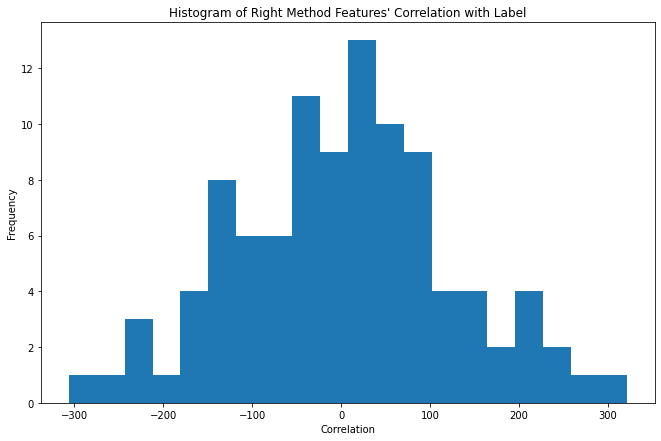

In [ ]:
#---------------HISTOGRAM OF CORRELATIONS OF RANDOMLY GENERATED FEATURES WITH LABLE RIGHT METHOD
#TEST SET WITH FEATURES SELECTED IN WRONG WAY
test_x_select = data_x[:,arg_order_right]
test_x_select = test_x_select[test_plot_cord_right,:]
test_y_selct = data_y[test_plot_cord_right]
#INITIATE THE ARRAY FOR STORING CORRELATIONS
correlations_test = np.zeros(100)
#RECALC CORRELATION
for num in range(100):
  correlations_test[num] = np.correlate(test_x_select[:,num],test_plot_cord_wrong.flatten())
#PLOT THE HISTOGRAM
plt.figure(figsize=(11,7))
plt.hist(correlations_test, bins=20)
plt.title('Histogram of Right Method Features\' Correlation with Label')
plt.ylabel('Frequency')
plt.xlabel('Correlation')
plt.show()

In [ ]:
np.mean(correlations_test)

1.6332003991873052

Compare to the hist diagram of the wrong method, it is clear that the mean of this hist is at 0, so indicating an average 0 relationship between features and lable

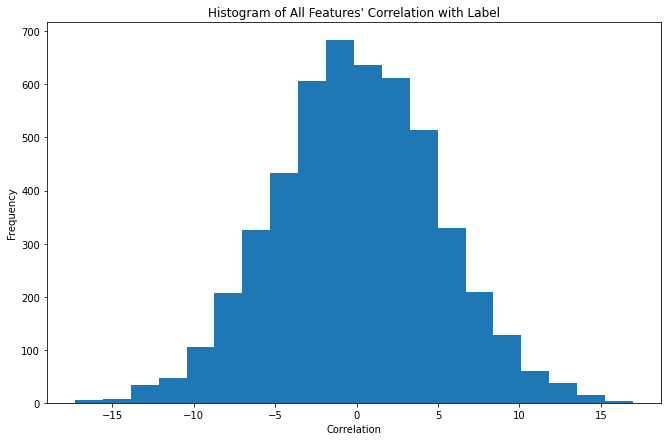

In [ ]:
#---------------HISTOGRAM OF CORRELATIONS OF RANDOMLY GENERATED FEATURES WITH LABLE
#PLOT THE HISTOGRAM
plt.figure(figsize=(11,7))
plt.hist(correlations, bins=20)
plt.title('Histogram of All Features\' Correlation with Label')
plt.ylabel('Frequency')
plt.xlabel('Correlation')
plt.show()

This is the hist digram of all features with the the lable before any feature selection, it can clearly see the mean is around 0